# Amazon Reviews Sentiment Analysis Project

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')

## Data Collection

In [7]:
df = pd.read_csv('Reviews.csv', nrows=10000)

In [8]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
df.shape

(10000, 10)

In [36]:
df.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

## Data Exploration and Preprocessing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      10000 non-null  int64 
 1   ProductId               10000 non-null  object
 2   UserId                  10000 non-null  object
 3   ProfileName             10000 non-null  object
 4   HelpfulnessNumerator    10000 non-null  int64 
 5   HelpfulnessDenominator  10000 non-null  int64 
 6   Score                   10000 non-null  int64 
 7   Time                    10000 non-null  int64 
 8   Summary                 10000 non-null  object
 9   Text                    10000 non-null  object
dtypes: int64(5), object(5)
memory usage: 781.4+ KB


In [13]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,10000.00000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,5000.50000,1.573500,2.014900,4.134500,1.294359e+09
std,2886.89568,5.230634,5.807551,1.327172,4.769699e+07
min,1.00000,0.000000,0.000000,1.000000,9.617184e+08
25%,2500.75000,0.000000,0.000000,4.000000,1.268762e+09
50%,5000.50000,0.000000,1.000000,5.000000,1.307837e+09
75%,7500.25000,2.000000,2.000000,5.000000,1.329955e+09
max,10000.00000,187.000000,216.000000,5.000000,1.351210e+09


In [14]:
# Check for duplicate entries
duplicate_entries = df.duplicated().sum()
print(f"Duplicate entries: {duplicate_entries}")

Duplicate entries: 0


In [17]:
df['Score'].value_counts()

Score
5    6183
4    1433
1     932
3     862
2     590
Name: count, dtype: int64

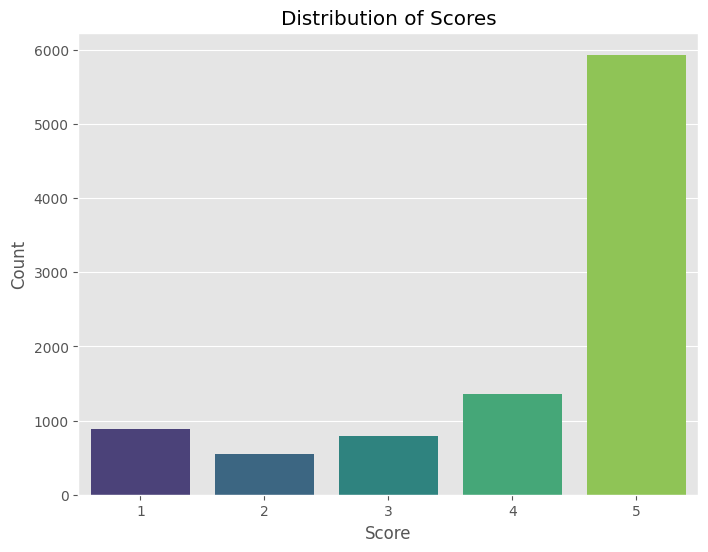

In [83]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df_cleaned, palette='viridis')
plt.title('Distribution of Scores')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()


In [25]:
# Drop irrelevant columns
df_cleaned = df.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'Time'], axis=1, errors='ignore')

In [26]:
# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Remove duplicates if there are any
df_cleaned = df_cleaned.drop_duplicates()

In [27]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9528 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   HelpfulnessNumerator    9528 non-null   int64 
 1   HelpfulnessDenominator  9528 non-null   int64 
 2   Score                   9528 non-null   int64 
 3   Summary                 9528 non-null   object
 4   Text                    9528 non-null   object
dtypes: int64(3), object(2)
memory usage: 446.6+ KB


In [28]:
df_cleaned.head()

,HelpfulnessNumerator,HelpfulnessDenominator,Score,Summary,Text
0,1,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,0,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,1,1,4,"""Delight"" says it all",This is a confection that has been around a fe...
3,3,3,2,Cough Medicine,If you are looking for the secret ingredient i...
4,0,0,5,Great taffy,Great taffy at a great price. There was a wid...


## Text Preprocessing

In [41]:
# Import necessary libraries for text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
# Download required NLTK data files
nltk.download('punkt')  # Tokenizer
nltk.download('stopwords')  # Stopwords
nltk.download('wordnet')  # Lemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [51]:
# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

In [52]:
# Load stopwords from nltk
stop_words = set(stopwords.words('english'))

In [58]:
# Text cleaning function
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Remove special characters, numbers, and punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatize the words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into a single string
    clean_text = ' '.join(tokens)
    
    return clean_text

In [59]:
# Apply the cleaning function to the 'Text' column
df_cleaned['cleaned_text'] = df_cleaned['Text'].apply(clean_text)

In [60]:
df_cleaned[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,I have bought several of the Vitality canned d...,bought several vitality canned dog food produc...
1,Product arrived labeled as Jumbo Salted Peanut...,product arrived labeled jumbo salted peanutsth...
2,This is a confection that has been around a fe...,confection around century light pillowy citrus...
3,If you are looking for the secret ingredient i...,looking secret ingredient robitussin believe f...
4,Great taffy at a great price. There was a wid...,great taffy great price wide assortment yummy ...


## Sentiment Labeling

In [62]:
# Define a function to label sentiments based on the Score
def label_sentiment(score):
    if score <= 2:
        return 'Negative'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Positive'

In [63]:
# Apply this function to the 'Score' column
df_cleaned['sentiment'] = df_cleaned['Score'].apply(label_sentiment)

# Display the first few rows to check if labels are correct
print(df_cleaned[['Score', 'sentiment', 'cleaned_text']].head())

   Score sentiment                                       cleaned_text
0      5  Positive  bought several vitality canned dog food produc...
1      1  Negative  product arrived labeled jumbo salted peanutsth...
2      4  Positive  confection around century light pillowy citrus...
3      2  Negative  looking secret ingredient robitussin believe f...
4      5  Positive  great taffy great price wide assortment yummy ...


## Train-Test Split

In [64]:
from sklearn.model_selection import train_test_split

In [66]:
# Split the data into features (X) and labels (y)
X = df_cleaned['cleaned_text']  # Input features (cleaned reviews)
y = df_cleaned['sentiment']  # Target labels (sentiment)

In [67]:
# Perform the train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the number of examples in the training and testing sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 7622
Test set size: 1906


## Text Vectorization (Converting Text to Numbers)

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
# Initialize the TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))

In [70]:
# Fit and transform the training data, and transform the test data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Display the shape of the transformed data
print(f'Training data shape: {X_train_tfidf.shape}')
print(f'Test data shape: {X_test_tfidf.shape}')

Training data shape: (7622, 5000)
Test data shape: (1906, 5000)


## Train the Sentiment Classification Model

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [72]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=200)

In [73]:
# Train the model using the TF-IDF-transformed training data
log_reg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=200)

In [75]:
# Make predictions on the test data
y_pred = log_reg.predict(X_test_tfidf)

In [76]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8221


In [77]:
# Generate a classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.38      0.51       288
     Neutral       0.65      0.08      0.15       153
    Positive       0.83      0.99      0.90      1465

    accuracy                           0.82      1906
   macro avg       0.75      0.48      0.52      1906
weighted avg       0.80      0.82      0.78      1906



In [78]:
# Display the confusion matrix
print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[ 110    3  175]
 [  17   13  123]
 [  17    4 1444]]


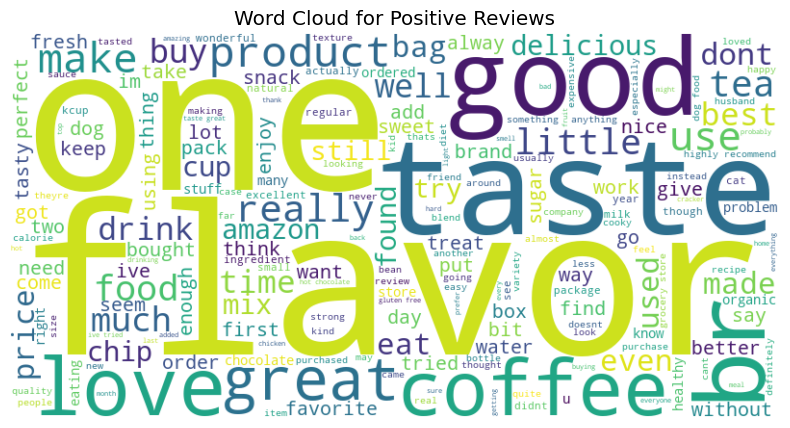

In [87]:
from wordcloud import WordCloud

# Generate a word cloud for positive reviews
positive_reviews = df_cleaned[df_cleaned['Score'] > 3]['cleaned_text'].str.cat(sep=' ')
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


## Using Another Model

In [79]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model using the TF-IDF-transformed training data
rf_clf.fit(X_train_tfidf, y_train)

# Make predictions on the test data
y_pred_rf = rf_clf.predict(X_test_tfidf)

# Evaluate the Random Forest model performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {accuracy_rf:.4f}')

# Classification report for Random Forest
print('\nRandom Forest Classification Report:')
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
print('\nRandom Forest Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7922

Random Forest Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.20      0.31       288
     Neutral       0.60      0.02      0.04       153
    Positive       0.80      0.99      0.88      1465

    accuracy                           0.79      1906
   macro avg       0.71      0.40      0.41      1906
weighted avg       0.77      0.79      0.73      1906


Random Forest Confusion Matrix:
[[  57    0  231]
 [   9    3  141]
 [  13    2 1450]]


In [80]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_tfidf, y_train)

# Display the best parameters
print(f'Best Parameters: {grid_search.best_params_}')

# Make predictions using the best model
y_pred_best_rf = grid_search.predict(X_test_tfidf)

# Evaluate the tuned model
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f'Tuned Random Forest Accuracy: {accuracy_best_rf:.4f}')


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Random Forest Accuracy: 0.7802


## Feature Importance

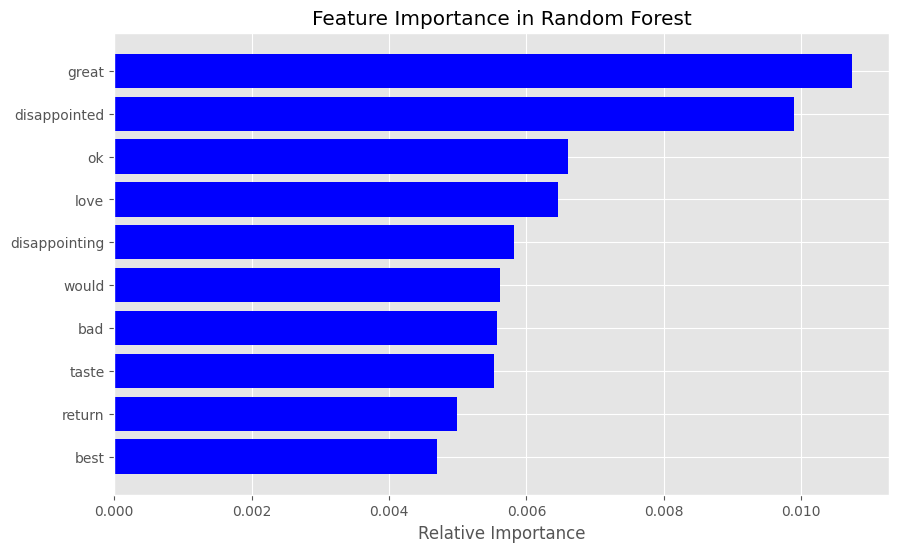

In [81]:
# Get feature importances from the trained Random Forest model
importances = rf_clf.feature_importances_

# Sort the features by importance
indices = np.argsort(importances)[-10:]  # Top 10 important features

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title('Feature Importance in Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [tfidf.get_feature_names_out()[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


## Save the Model

In [82]:
import joblib

# Save the Random Forest model
joblib.dump(rf_clf, 'random_forest_model.pkl')

# Save the TF-IDF transformer
joblib.dump(tfidf, 'tfidf_transformer.pkl')

['tfidf_transformer.pkl']